Defaulting to user installation because normal site-packages is not writeable
Digite o código da ação: PETR4.SA
Defaulting to user installation because normal site-packages is not writeable


20:51:34 - cmdstanpy - INFO - Chain [1] start processing
20:51:35 - cmdstanpy - INFO - Chain [1] done processing


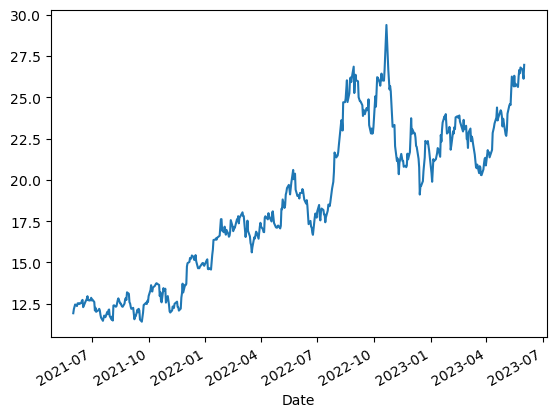

In [32]:
# Carregar dados das ações

!pip install yfinance

import yfinance as yf

ticker = input("Digite o código da ação: ")
dados = yf.Ticker(ticker).history("2y")
dados.head

dados["Close"].plot()

dados.head()

treinamento = dados.reset_index()
treinamento = treinamento[["Date", "Close"]]
treinamento["Date"] = treinamento["Date"].dt.tz_localize(None)
treinamento.columns = ['ds', 'y']
treinamento

!pip install prophet

from prophet import Prophet
from prophet.plot import plot_plotly

#criar o modelo
modelo = Prophet()

# treinar modelo
modelo.fit(treinamento)

periodo = modelo.make_future_dataframe(120)

periodo.tail()

previsoes = modelo.predict(periodo)

previsoes

# Visualização gráfica

plot_plotly(modelo, previsoes)